In [28]:
import pandas as pd
import numpy as np

from sklearn.datasets import fetch_california_housing

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error


In [2]:
#load the data
housing  = fetch_california_housing()

In [ ]:
housing.data.shape

(20640, 8)

In [7]:
housing.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,))

In [9]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

Convert into pandas dataframe

In [12]:
df = pd.DataFrame(housing.data,columns=housing.feature_names)

In [14]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [15]:
df['MedHouseVal'] = housing.target

In [16]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Fetchin X out of data

In [17]:
X = df[['MedInc']]
y = df['MedHouseVal']

Split the data in training and testing subsets

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Initialize Linear regression model

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

Predict the values

In [20]:
y_pred = regressor.predict(X_test)

In [21]:
y_pred

array([1.14958917, 1.50606882, 1.90393718, ..., 4.31500772, 1.612455  ,
       1.93412956], shape=(4128,))

In [25]:
m = mean_absolute_error(y_test,y_pred)

In [26]:
print(f"Mean absolute error: {m:.4f} ")

Mean absolute error: 0.6299 


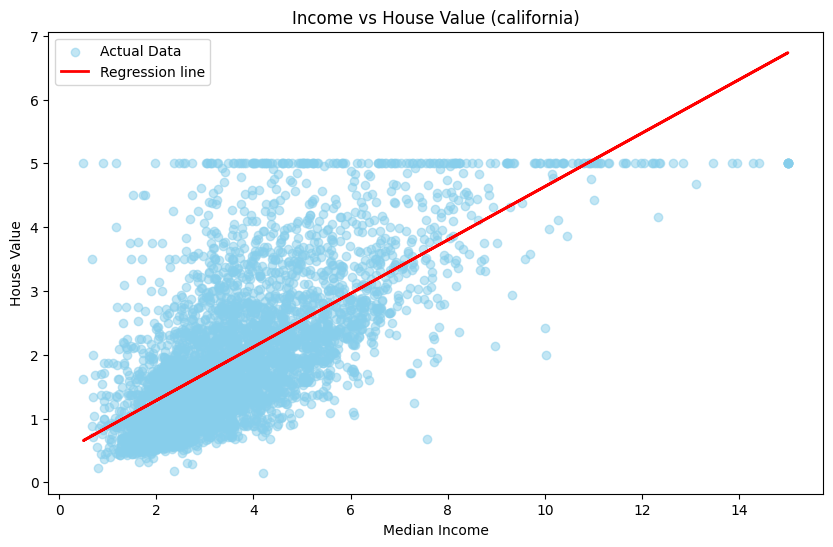

In [30]:
plt.figure(figsize=(10,6))
plt.scatter(X_test,y_test,color='skyblue',alpha=0.5,label='Actual Data')
plt.plot(X_test,y_pred,color='red',linewidth=2,label="Regression line")
plt.title("Income vs House Value (california)")
plt.xlabel("Median Income")
plt.ylabel("House Value")
plt.legend()
plt.show()